<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01273286/blob/main/Notebook_1_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tecnológico de Monterrey**

# Maestría en Inteligencia Artificial Aplicada


> Dra. María de la Paz Rico Fernández


> Curso: Ciencia y Analítica de Datos

> Entregable : Actividad Semanal -- 7 Regresiones y K means NOTEBOOK 1

> Alumno:

*   LUIS ALFONSO SABANERO ESQUIVEL - A01273286

>09/11/2022

> https://github.com/PosgradoMNA/actividades-de-aprendizaje-A01273286

In [ ]:
#Importamos librerias para el ejercicio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Ejercicio 1 Regresiones

In [ ]:
#Leemos dataset al ser pequeño ponemos ruta fija
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
65,2.502705,44.442539
128,2.998296,42.393697
672,5.055963,38.520193
580,4.704648,37.976470
812,5.581813,29.693099
480,4.354280,39.933862
522,4.522099,35.184621
171,3.187171,39.442397
854,5.803924,35.285484
108,2.861985,63.468384


In [ ]:
#La entrada es el numero de unidades, salida costo de manufactura
X = df[['Number of Units']]
y = df['Manufacturing Cost']
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.90, random_state=42) #Entrenamiento 90% Test 10%
metricas={"R2":"r2", "MAE":'neg_mean_absolute_error'} #Metricas de desempeño
resultados = list() #Para la graficas

## Regresión Lineal

In [ ]:
#Generamos el objeto de regresion lineal
LR=LinearRegression(fit_intercept=True)
#Kflod y cross validate para evaluar el modelo con las metricas r2 y mae
kfold = RepeatedKFold(n_splits=5, n_repeats=5)
scores = cross_validate(LR, X_train, y_train,scoring=metricas, cv=kfold)
resultados.append(scores) #Los acumulo en una lista
LR.fit(X_train,y_train) #Ajustamos el modelo con set de entrenamiento

LinearRegression()

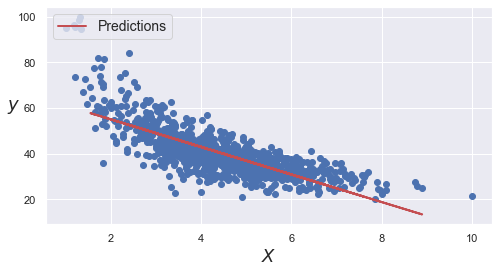

In [ ]:
# construct best fit line

y_fit = LR.predict(X_test) #Predecimos con el set de prueba

#Codigo para graficar la curva generada
plt.scatter(X, y)


plt.plot(X_test, y_fit, "r-", linewidth=2, label="Predictions")

plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [ ]:
#Imprimimos los coeficientes
LR.coef_, LR.intercept_

(array([-6.03357276]), 67.03883293539208)

Ecuación del modelo:

$\hat{y} =  -6.03X + 67.03$

In [ ]:
#Calculamos los errores de la actividad con el set de prueba y los valores predichos
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit)))
print('r2_score',r2_score(y_test, y_fit))

Error medio Absoluto (MAE): 4.581575620531286
Root Mean Squared Error: 5.820691087508853
r2_score 0.6544705154382864


## Regresión Polynomial

In [ ]:
#Para la polinomial se usa polynomial features con el grado en degree
poly_features = PolynomialFeatures(degree=3, include_bias=False)
#Transformamos la informacion
X_poly = poly_features.fit_transform(X_train)
#Se usa la regresion lineal como base para la polinomial
poly_lr = LinearRegression(fit_intercept=True)
#Para recopilar los datos de la grafica
kfold = RepeatedKFold(n_splits=5, n_repeats=5)
scores = modelo_LR = cross_validate(poly_lr, X_train, y_train,scoring=metricas, cv=kfold)
resultados.append(scores)
poly_lr.fit(X_poly, y_train) #Entrenamos con train

LinearRegression()

In [ ]:
#Coeficientes de la curva
poly_lr.coef_, poly_lr.intercept_

(array([-33.51781176,   4.92820286,  -0.25781031]), 111.93124540906577)

Ecuación del modelo:

$\hat{y} =  -33.51X +4.92X^2 -0.25 X^3+ 111.93$

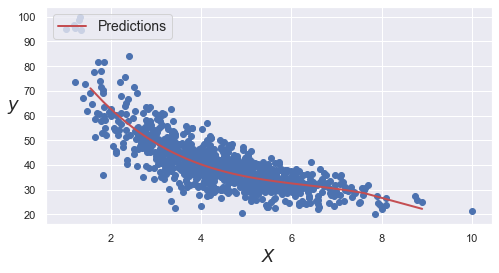

In [ ]:
X_new_poly = poly_features.transform(X_test)
y_fit_poly = poly_lr.predict(X_new_poly) #Predecimos con test

#Codigo para graficar la curva 
plt.scatter(X, y)

#Como vienen en desorden arreglamos ese problema con ORDER
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_poly[order]
plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")

plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [ ]:
#Mostramos los resultados de las metricas
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_poly))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_poly)))
print('r2_score',r2_score(y_test, y_fit_poly))

Error medio Absoluto (MAE): 4.0214749634696725
Root Mean Squared Error: 5.008191565483052
r2_score 0.7442015699279128


## RIDGE

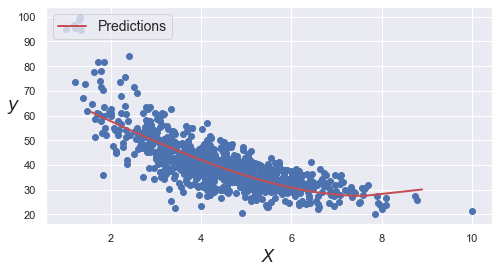

In [ ]:
#ridge_lr = Ridge(alpha=0.01)
#ridge_lr.fit(X, y)
#y_fit = ridge_lr.predict(X_test)

#Nos ahorramos codigo usando la funcion pipeline 
#Usaremos polinomial con el ridge para predecir la curva
model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 20, solver = 'cholesky', random_state = 42))])
#Parte para medir la metrica
kfold = RepeatedKFold(n_splits=5, n_repeats=5)
scores = modelo_LR = cross_validate(model_ridge, X_train, y_train,scoring=metricas, cv=kfold)
resultados.append(scores)

#Entrenamos el modelo por medio del pipeline
model_ridge.fit(X_train, y_train)

y_fit_ridge = model_ridge.predict(X_test)

#Codigo para la grafica
plt.scatter(X_train, y_train)

order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_ridge[order]
plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")



plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [ ]:
#Coeficientes para el modelo
model_ridge['ridge'].coef_, model_ridge['ridge'].intercept_

(array([-11.6769905 ,  -0.47469886,   3.11113843,   1.74354175]),
 40.02356938918892)

Ecuación del modelo:

$\hat{y} =  -11.67X -0.47X^2 +3.11 X^3+1.74X^4 + 40.02$

In [ ]:
#Errores del modelo
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_ridge)))
print('r2_score',r2_score(y_test, y_fit_ridge))

Error medio Absoluto (MAE): 4.179125481676017
Root Mean Squared Error: 5.24068598927093
r2_score 0.7199005301981286


## LASSO

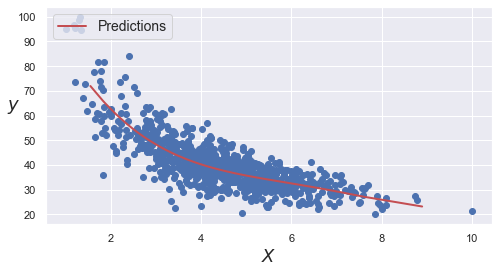

In [ ]:
#Como en el Ridge se usa el pipeline para simplificar el codigo
model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Lasso(alpha = 0.001,max_iter=1000000, random_state = 42))])
#Parte para obtener el desempeño del modelo graficas
kfold = RepeatedKFold(n_splits=5, n_repeats=5)
scores  = cross_validate(model_lasso, X_train, y_train,scoring=metricas, cv=kfold)
resultados.append(scores)

#Entrenamos pipeline con el train
model_lasso.fit(X_train, y_train)

#predecimos con test
y_fit_lasso = model_lasso.predict(X_test)

#Grafica de lasso
plt.scatter(X_train, y_train)

order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = y_fit_lasso[order]
plt.plot(sortedX, sorted_pred, "r-", linewidth=2, label="Predictions")



plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [ ]:
#Coeficientes del modelo
model_lasso['ridge'].coef_, model_lasso['ridge'].intercept_

(array([-58.04365001,  99.42933863, -55.38063209,  -0.        ,
          1.97617456,   3.55560078]),
 40.023569389188985)

Ecuación del modelo:

$\hat{y} =  -58.04X +99.42X^2 -55.38 X^3-0X^4+ 1.97X^5 +3.55X^6+ 40.02$

In [ ]:
#Resultado de los errores
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_fit_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_fit_lasso)))
print('r2_score',r2_score(y_test, y_fit_lasso))

Error medio Absoluto (MAE): 4.050834464430144
Root Mean Squared Error: 5.0090222269280815
r2_score 0.7441167091505387


## Gradicas Desempeño R^2

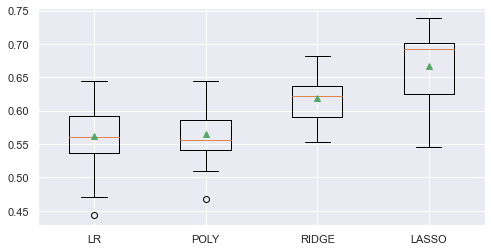

In [ ]:
#Con las graficas obtenidas en la lista resultados, la pasamos por un for para que se muestren los resultados de entrenamiento por modelo
sns.set(rc={'figure.figsize':(8,4)})

temporal= list()
for i in range(len(resultados)):
  rr = resultados[i]['test_R2']
  temporal.append(rr)

#Los labels van en orden de ejecucion
plt.boxplot(temporal, labels=["LR","POLY","RIDGE","LASSO"], showmeans=True)

plt.show()

## Gradicas Desempeño MAE

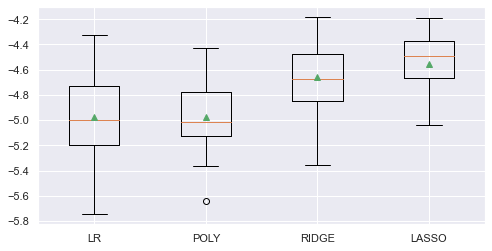

In [ ]:
#Con las graficas obtenidas en la lista resultados, la pasamos por un for para que se muestren los resultados de entrenamiento por modelo
##La grafica sale negativa porque la metrica por default es neg_mean_absolute_error
sns.set(rc={'figure.figsize':(8,4)})

temporal= list()
for i in range(len(resultados)):
  rr = resultados[i]['test_MAE']
  temporal.append(rr)

plt.boxplot(temporal, labels=["LR","POLY","RIDGE","LASSO"], showmeans=True)

plt.show()

## Conclusiones: 
* ¿Que método conviene más a la empresa, ¿por qué?

Dado el resultado de las métricas el mejor modelo por el que puede optar la empresa sería el uso de LASSO para sus predicciones, aunque por ejemplo el resultado R2 nos indica que el modelo solo puede llegar a dar una predicción del 0.74 correctamente, por lo que sería ideal usar otro modelo que pueda generalizar mejor el dataset

* ¿Que porcentajes de entrenamiento y evaluación usaste?

Se usaron el 90% de la información para el set de entrenamiento y el resto 10% se uso para la evaluación

* ¿Que error tienes?, ¿es bueno?, ¿cómo lo sabes?

En la parte de errores, se puede ver un desempeño casi similar entre la regresión polinomial, Lasso y Ridge. En este caso el modelo de regresión lineal no logra generalizar correctamente los datos de este dataset por lo que se descartaría. 
En cuanto a los demás modelos, vemos un crecimiento gradual del desempeño de las métricas donde los factores clave son el grado del polinomio y el alpha que se emplea en los modelos lasso y ridge. Entre más alpha tenga ridge la curva se catigaba más.
No son las mejores métricas que podemos obtener dado que el mejor solo llego a un 0.74 con el conjunto de entrenamiento y 0.69 con el conjuento de prueba por lo que se podría optar por usar un modelo diferente para la información


# Ejercicio 2 Regresion Multiple

In [ ]:
#Leemos el dataset para el ejercicio 2, se pone local porque pesa mucho para leerlo desde la url
df_mul = pd.read_csv('kc_house_data.csv',sep=",")
df_mul.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Codigo para quitar las variables que no nos importan para el modelo
df_mul.drop('id', axis = 1, inplace = True)
df_mul.drop('date', axis = 1, inplace = True)
df_mul.drop('zipcode', axis = 1, inplace = True)
df_mul.drop('lat', axis = 1, inplace = True)
df_mul.drop('long', axis = 1, inplace = True)


In [ ]:
#Codigo para determinar la salida del modelo
columns = df_mul.columns.drop('price')

features = columns
label = ['price']

X = df_mul[features]
y = df_mul[label]

In [ ]:
#Codigo de particion como el previo usamos 90-10 para el modelo
MX_train, MX_test, My_train, My_test = train_test_split(X, y, train_size= 0.9, random_state = 42) #90% para Train y 10% para test
metricas={"R2":"r2", "MAE":'neg_mean_absolute_error'}
resultados_m = list() #Para la graficas

## Regresion Lineal Multiple

In [ ]:
#La regresion multiple funciona con el mismo codigo que la simple solo cambia el xtrain usado
LRM=LinearRegression(fit_intercept=True)
#Scores para las metricas
kfold = RepeatedKFold(n_splits=5, n_repeats=5)
scores = modelo_LR = cross_validate(LRM, MX_train, My_train,scoring=metricas, cv=kfold)
resultados_m.append(scores)
#Entrenamos con train predecimos con test
LRM.fit(MX_train,My_train)
y_fit = LRM.predict(MX_test)

In [ ]:
LRM.coef_
LRM.intercept_
lista=""
cont=1
for i in LRM.coef_.ravel():
    lista+=(str(i)+' X'+str(cont)+' ')
    cont+=1


#print(LRM.coef_.ravel())

print( lista+ str(LRM.intercept_))

#print(" i {}".format([i for i in LRM.coef_.ravel()]))


-40058.55232506637 X1 48903.38289482001 X2 109.46520638978836 X3 -0.025258978981582914 X4 24974.478990570926 X5 564105.7060360991 X6 43025.77315087153 X7 18438.154030980677 X8 118273.28541638666 X9 52.06397295249553 X10 57.40123399024105 X11 -3576.9822845731337 X12 9.826307041013848 X13 24.542187028651824 X14 -0.531614380703104 X15 [6221342.80254659]


Ecuación del modelo:
$\hat{y} =  -40058.55232506637 X1+ 48903.38289482001 X2 +109.46520638978836 X3 -0.025258978981582914 X4 +24974.478990570926 X5+ 564105.7060360991 X6+ 43025.77315087153 X7+ 18438.154030980677 X8 +118273.28541638666 X9+ 52.06397295249553 X10 +57.40123399024105 X11 -3576.9822845731337 X12 +9.826307041013848 X13+ 24.542187028651824 X14 -0.531614380703104 X15+ 6221342.80254659$

In [ ]:
#Obtenemos las metricas
print('Error medio Absoluto (MAE):', mean_absolute_error(My_test, y_fit))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(My_test, y_fit)))
print('r2_score',r2_score(My_test, y_fit))

Error medio Absoluto (MAE): 143442.02866793738
Root Mean Squared Error: 226877.74290228297
r2_score 0.646665069185899


## Regresion Polinomial Multiple

In [ ]:
#Como en la simple, la polinomial parte del polynomial features y el degree
poly_features_mul = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features_mul.fit_transform(MX_train) #Transformamos entrenamiento
poly_lr_mul = LinearRegression(fit_intercept=True)
#Para las metricas de la grafica
kfold = RepeatedKFold(n_splits=5, n_repeats=5)
scores = modelo_LR = cross_validate(poly_lr_mul, MX_train, My_train,scoring=metricas, cv=kfold)
resultados_m.append(scores)
#Entrenamos con train
poly_lr_mul.fit(X_poly, My_train)
X_new_poly = poly_features_mul.transform(MX_test)
#Predecimos con test
y_fit_poly = poly_lr_mul.predict(X_new_poly)

In [ ]:
poly_lr_mul.coef_
poly_lr_mul.intercept_
lista=""
cont=1
for i in poly_lr_mul.coef_.ravel():
    lista+=(str(i)+' ')
    cont+=1

#Debido a la alta cantidad de parametros se informan solo los coefincientes que el modelo obtuvo, no podemos armar formato latex
#Comenta la profesora que dejemos el arreglo con los coeficientes
print("Coeficientes: {}".format(lista))

print("Intercept: {}".format(poly_lr_mul.intercept_))


Coeficientes: 852724.280054324 -1117512.5040722985 -206.56165312666522 -42.26042564683538 -2027255.2368565311 -4404312.0307920175 -102881.65834604483 545097.489678647 1162112.555019642 -471.24918452016686 -473.8212895463894 -82416.58545678486 -3277.9370193158297 3958.083124179423 -11.793884432082791 981.2742245936763 2995.201807184813 -9.62410174304523 0.28471192243432597 15003.610905442367 -12681.992647718029 -267.1225017197293 -4074.860266518421 -2847.9594766040937 -5.889553216569766 -16.310892232490573 -438.059048049377 -7.716235163803702 16.992511107729115 0.016307812298691715 -7349.474330848776 22.884562165934994 -0.5994676593711006 -28619.905308107507 -2443.9784185743947 10949.870900194948 2150.236560241323 16288.831251598842 22.343612082048026 0.25495462439022276 526.7839839074323 -18.75457533860095 -21.071061309145307 0.4094343894804524 615.4571100154426 -1123.590309633175 -8.611018443558123 175.2594268858065 -13.12116570796735 5.638535749838184 22.361495607972756 -785.69821837

In [ ]:
#Se muestran los errores de la matriz
print('Error medio Absoluto (MAE):', mean_absolute_error(My_test, y_fit_poly))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(My_test, y_fit_poly)))
print('r2_score',r2_score(My_test, y_fit_poly))

Error medio Absoluto (MAE): 131378.48727324526
Root Mean Squared Error: 223117.35561743026
r2_score 0.6582807092776741


## Ridge

In [ ]:
#Aplicaremos ridge con una regresion polinomial de grado 2, usaremos el pipeline para simplificar codigo
model_ridge_mul = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 20, solver = 'cholesky', random_state = 42))])
#Guardamos el desempeño para las graficas del final
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(model_ridge_mul, MX_train, My_train,scoring=metricas, cv=kfold)
resultados_m.append(scores)

#Entrenamos con train, predecimos con test
model_ridge_mul.fit(MX_train, My_train)

y_fit_ridge = model_ridge_mul.predict(MX_test)

In [ ]:
#model_ridge_mul['ridge'].coef_, model_ridge_mul['ridge'].intercept_
#Para obtener el campo se usa objeto pipeline (paso).propiedad del objeto
lista=""
cont=1
for i in model_ridge_mul['ridge'].coef_.ravel():
    lista+=(str(i)+' ')
    cont+=1

#print(model_ridge_mul['ridge'].coef_.ravel())

#Debido a la alta cantidad de parametros se informan solo los coefincientes que el modelo obtuvo, no podemos armar formato latex
#Comenta la profesora que dejemos el arreglo con los coeficientes
print("Coeficientes: {}".format(lista))

print("Intercept: {}".format(model_ridge_mul['ridge'].intercept_))

Coeficientes: 38035.00833315902 13254.414904214293 -343.00106274248736 -67793.08245207665 -12147.585750524144 -5748.553542402081 -22122.327215815338 19661.55217702035 60012.387260696916 -5243.364082170743 9153.630323563668 -66327.58355254964 -31766.325641482937 65304.18776113118 24009.87633474075 10254.113040723265 -24762.850762358386 -27186.42690856333 6450.870313713839 25171.323510841532 -4621.692708335438 -268.40382351794557 905.5969045683237 2890.0462097957397 -20990.90314858721 -24149.721807299185 -63873.15535500103 1254.926597914477 47436.35223339513 11380.964670570098 7891.9000328549755 70191.0628401822 -22340.313325542735 -45412.3088543674 5886.932260201727 20791.33345898167 -35715.98561653435 90122.45236971423 83452.10720877169 -4137.760463800454 -1075.9436477720128 -25451.044509467094 -77168.33129352964 15714.062313310273 16811.147618831834 -25782.40510077714 -25034.446647675224 35534.71470362562 -18765.58869230598 13621.914744934536 133478.17993023677 21955.255328997497 -514

In [ ]:
#Imprimimos los errores del modelo
print('Error medio Absoluto (MAE):', mean_absolute_error(My_test, y_fit_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(My_test, y_fit_ridge)))
print('r2_score',r2_score(My_test, y_fit_ridge))

Error medio Absoluto (MAE): 132082.52498095372
Root Mean Squared Error: 220422.79876944033
r2_score 0.6664846607348995


In [ ]:
#Usaremos la regresion polinomial, aplicando lasso, pipeline nos simplificara codigo para mejor manejo
model_lasso_mul = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Lasso(alpha = 0.001,max_iter=10000, random_state = 42))])
                  #El modelo no converge rapido ponerle mas iteraciones no garantiza una mejor metrica o desempeño

#Guardamos desempeño para las graficas
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(model_lasso_mul, MX_train, My_train,scoring=metricas, cv=kfold,n_jobs=-1)
resultados_m.append(scores)

#Parte de entrenamiento y prediccion
model_lasso_mul.fit(MX_train, My_train)

y_fit_lasso = model_lasso_mul.predict(MX_test)

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.215e+14, tolerance: 2.598e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#model_lasso_mul['ridge'].coef_, model_lasso_mul['ridge'].intercept_
#Para obtener el campo se usa objeto pipeline (paso).propiedad del objeto
#Armamos un for para obtener los coeficientes por separado
lista=""
cont=1
for i in model_lasso_mul['ridge'].coef_.ravel():
    lista+=(str(i)+' ')
    cont+=1


#Debido a la alta cantidad de parametros se informan solo los coefincientes que el modelo obtuvo, no podemos armar formato latex
#Comenta la profesora que dejemos el arreglo con los coeficientes
print("Coeficientes: {}".format(lista))

print("Intercept: {}".format(model_lasso_mul['ridge'].intercept_))

Coeficientes: 579500.0473177384 -92040.19514454612 425837.0005065147 -716026.1076294912 -310611.06827771966 -234435.3157627474 300400.079344889 450474.5548302487 750487.6665818397 -320194.9386872415 -181443.6171469637 -387598.8593263965 -505362.5388413992 703145.4944888132 -185028.08977084974 10947.434977680328 -1552.6380702537972 -72478.17112398901 21359.19281650556 37670.10773599647 -6550.613731243788 -2127.67603560812 -9173.605293020908 -22943.026143776013 2677.9504459183086 -14985.928057899357 -603568.5158269621 -5382.643313892085 66910.00408486988 8102.030664472028 -7416.908002799724 250899.02716309647 -52656.646332056596 -50545.78395144639 2373.1122448364686 26844.44740701627 -25539.973404316952 133737.6374534855 -47272.37660424055 -54632.79240301315 65382.55525285546 -27484.587310966606 -98450.56338007827 35071.54144800239 -191136.04864232684 144563.99101246847 -20901.849552116404 -107013.11673554394 219999.593842991 -115859.31448101808 314143.86374261434 -291141.8282669907 -133

In [ ]:
#Mostramos errores conjunto de prueba
print('Error medio Absoluto (MAE):', mean_absolute_error(My_test, y_fit_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(My_test, y_fit_lasso)))
print('r2_score',r2_score(My_test, y_fit_lasso))

Error medio Absoluto (MAE): 131345.41382245815
Root Mean Squared Error: 224178.95025164718
r2_score 0.6550211655292326


## Grafica Desempeño R2 

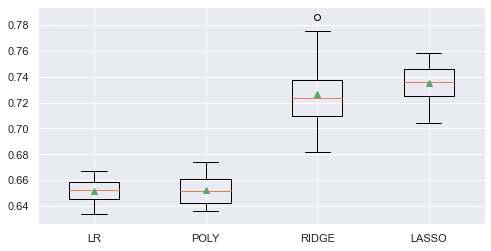

In [ ]:
#De la lista aplicada del cross validation, pasamos a un for la lista y aplicamo boxplot a las metricas de entrenamiento
sns.set(rc={'figure.figsize':(8,4)})

temporal= list()
for i in range(len(resultados_m)):
  rr = resultados_m[i]['test_R2']
  temporal.append(rr)

plt.boxplot(temporal, labels=["LR","POLY","RIDGE","LASSO"], showmeans=True)

plt.show()

## Grafica Desempeño MAE

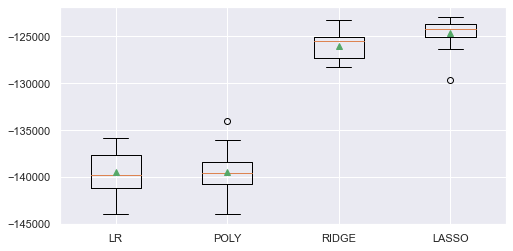

In [ ]:
##La grafica sale negativa porque la metrica por default es neg_mean_absolute_error
#De la lista aplicada del cross validation, pasamos a un for la lista y aplicamo boxplot a las metricas de entrenamiento
sns.set(rc={'figure.figsize':(8,4)})

temporal= list()
for i in range(len(resultados_m)):
  rr = resultados_m[i]['test_MAE']
  temporal.append(rr)

plt.boxplot(temporal, labels=["LR","POLY","RIDGE","LASSO"], showmeans=True)

plt.show()

## Conclusiones: 
* ¿Que método conviene más a la empresa, ¿por qué?
Analizando las métricas de errores y el desempeño con el crossvalidation vemos que el mejor modelo es el RIDGE debido a que no toma mucho tiempo computacional a diferencia de lasso que, aunque le des más iteraciones no logra llegar a converger. La polinomial también es una buena candidata subiendo el degree sin embargo considero mejor usar el RIDGE debido a que previene el sobreentrenamiento

* ¿Que porcentajes de entrenamiento y evaluación usaste?

Se usaron el 90% de la información para el set de entrenamiento y el resto 10% se uso para la evaluación

* ¿Que error tienes?, ¿es bueno?, ¿cómo lo sabes?
Estos modelos han demostrado ser superiores a la media, sin embargo, con un resultado que ronda entre el 0.60 y 0.66 en las métricas del conjunto de prueba. muestran que el modelo no es óptimo para salir a producción. 

Consideraría implementar un modelo más robusto y eliminar columna mediante un PCA para optimizar el dataset y dejar lo más limpio al modelo para su entrenamiento.
